# Medical insurance stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from patsy import dmatrices
import matplotlib.pyplot as plt

In [4]:
# Load csv file 
df = pd.read_csv('../datasets/insurance.csv', index_col=False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Sex

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
df.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


<AxesSubplot:xlabel='sex', ylabel='charges'>

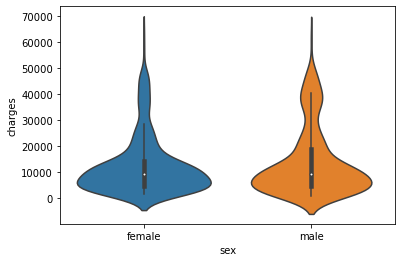

In [33]:
sns.violinplot(data=df, x='sex', y='charges')

Males 75th quartile and maximum are higher than females, although on average they are very similar. 

## Region

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


<AxesSubplot:xlabel='region', ylabel='charges'>

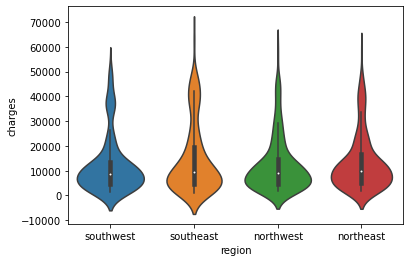

In [34]:
sns.violinplot(data=df, x='region', y='charges')

The Eastern regions on average pay more medical insurnace although from this it looks like that Region has not enough affect on the charges from medical insurance. 

## Smoker

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


<AxesSubplot:xlabel='smoker', ylabel='charges'>

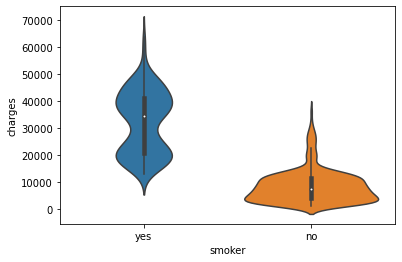

In [35]:
sns.violinplot(data=df, x='smoker', y='charges')

However, Smoking does have an impact on charges from medical insurance

# Children

In [23]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [25]:
df.groupby('children')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


<AxesSubplot:xlabel='children', ylabel='charges'>

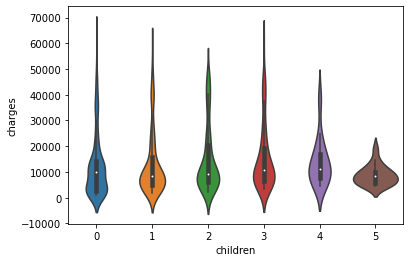

In [36]:
sns.violinplot(data=df, x='children', y='charges')

Although, it looks like on average people with 4 or 5 children pay less on average. The sample sizes are relatively small incomparison to people with less than 4 children so, this produces some bias in the data. however, comparing  less than 2 children (12k) with having 2 or 3 children (15k) looks like the more children you have on average the cost is slightly higher. 

# BMI

In [32]:
df.groupby('bmi').apply(lambda x: (x>30))

TypeError: '>' not supported between instances of 'str' and 'int'

## Model

In [4]:
# create a fitted model in one line
lm = smf.ols(formula='charges ~ age', data=df).fit()

# print the coefficients
lm.params

Intercept    3165.885006
age           257.722619
dtype: float64

In [18]:
3165.885006+257.722619*500

132027.194506

In [19]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'age': [500]})
X_new.head()

,age
0,500


In [20]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    132027.19434
dtype: float64

In [21]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'age': [df.age.min(), df.age.max()]})
X_new.head()

,age
0,18
1,64


In [22]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7804.892142
1    19660.132601
dtype: float64

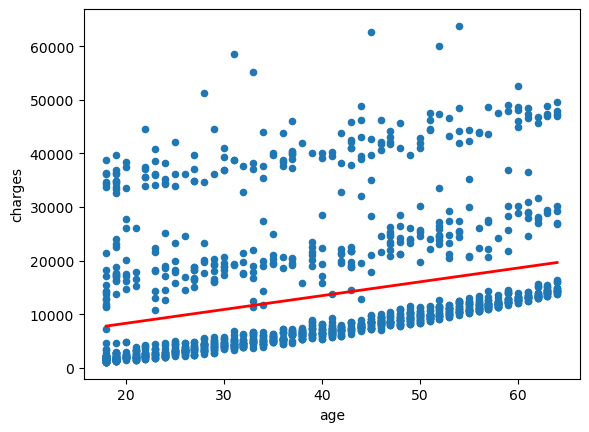

In [24]:
# first, plot the observed data
df.plot(kind='scatter', x='age', y='charges')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
     

In [25]:
lm.conf_int()

,0,1
Intercept,1327.440272,5004.329740
age,213.578754,301.866483
